### Topic : Intention Classification of Code Review Questions

Reference : Research paper - "Predicting Communicative Intention in Code Review Questions"

Link to the paper : https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjxqN_J_O3vAhUc7XMBHduvCcwQFjAAegQIAhAD&url=https%3A%2F%2Fwww.win.tue.nl%2F~aserebre%2FICSME2018NIER.pdf&usg=AOvVaw3wCsZN4EKvrFzuFFXUkQG6

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel("/content/sample_data/dataset.xlsx")
df.head()

,inline-comment-id,# Comment,Question,Final Label
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism


In [ ]:
df.shape

(499, 4)

In [ ]:
df['Final Label'].unique()

array(['request for confirmation', 'surprise', 'suggestion', 'criticism',
       'hypothetical scenario', 'request for action',
       'request for clarification', 'request for information',
       'request for opinion', 'rhetorical question', 'discarded',
       'request for rationale', 'action', 'anger'], dtype=object)

In [ ]:
len(df['Final Label'].unique())

14

In [ ]:
df.isnull().sum()

inline-comment-id    0
# Comment            0
Question             0
Final Label          0
dtype: int64

In [ ]:
# converting the labels belonging to subgroups into their parent group
df['New Label'] = df['Final Label']
for i in range(len(df)):
  if df['New Label'][i].startswith('request'):
    df['New Label'][i] = 'requests'
  elif df['New Label'][i] == 'criticism' or df['New Label'][i] == 'anger' or df['New Label'][i] == 'surprise':
    df['New Label'][i] = 'attitudes and emotions'
df['New Label'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array(['requests', 'attitudes and emotions', 'suggestion',
       'hypothetical scenario', 'rhetorical question', 'discarded',
       'action'], dtype=object)

In [ ]:
# grouping the additional two groups into a similar class
for i in range(len(df)):
  if df['New Label'][i] == 'action' or df['New Label'][i] == 'discarded':
    df['New Label'][i] = 'attitudes and emotions'
df['New Label'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['requests', 'attitudes and emotions', 'suggestion',
       'hypothetical scenario', 'rhetorical question'], dtype=object)

In [ ]:
 import nltk
 nltk.download('stopwords')
 nltk.download('wordnet')
!pip install contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 266kB 6.8MB/s 
     |████████████████████████████████| 327kB 10.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85393 sha256=9b80b154adebc73fb25c915660e241b0c80201ec9ee0ab03e9b7e49b3c92a646
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from keras.preprocessing.text import text_to_word_sequence
import string
import re

In [ ]:
df.head()

,inline-comment-id,# Comment,Question,Final Label,New Label
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,requests
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,attitudes and emotions
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,suggestion
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,suggestion
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,attitudes and emotions


In [ ]:
df['New Label'].value_counts()

requests                  272
suggestion                163
attitudes and emotions     45
hypothetical scenario      13
rhetorical question         6
Name: New Label, dtype: int64

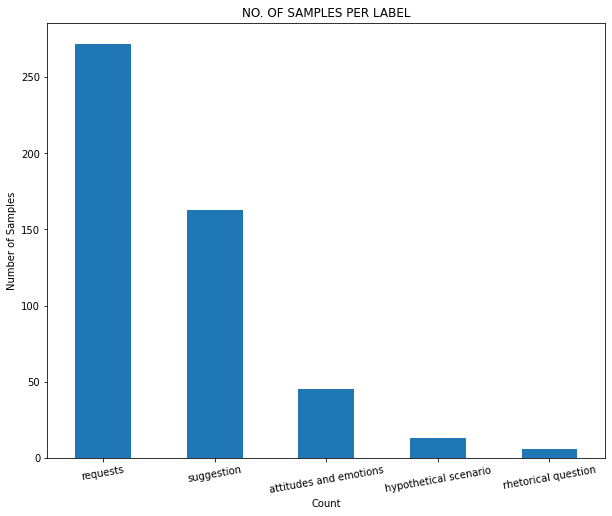

In [ ]:
# Plotting per label distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
df['New Label'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Samples')
plt.xlabel('Count')
plt.title('NO. OF SAMPLES PER LABEL')
plt.xticks(rotation = 10)
plt.show()

APPROACH 1

In [ ]:
df["Question Words"] = df["Question"]

df['excl_marks'] =df['Question Words'].apply(lambda x: x.count('!'))
df['qstn_marks'] = df['Question Words'].apply(lambda x: x.count('?'))
df['puncts'] = df['Question Words'].apply(lambda x: sum(x.count(w) for w in '.,;:'))
df['symbols'] = df['Question Words'].apply(lambda x: sum(x.count(w) for w in '*&$%-=()/_<>|#"'))
df["word_count"] = df['Question Words'].apply(lambda x:len(x.split()))

In [ ]:
import contractions

for i in range(len(df)):
  df["Question Words"][i] = contractions.fix(df["Question"][i])
  df["Question Words"][i] = text_to_word_sequence(df["Question Words"][i])
  df["Question Words"][i] = [word for word in df["Question Words"][i] if word.isalpha()]
  table = str.maketrans('', '', string.punctuation)
  df["Question Words"][i] = [w.translate(table) for w in df["Question Words"][i]]
  df['Question Words'][i] = ' '.join(df['Question Words'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Se

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_question = TfidfVectorizer(min_df=5, stop_words='english')
features_question = list(tfidf_question.fit_transform(df["Question Words"]).toarray())
features_excl_marks = list(df["excl_marks"])
features_qstn_marks = list(df["qstn_marks"])
features_word_count = list(df["word_count"])
features_symbols = list(df["symbols"])
features_puncts = list(df["puncts"])

In [ ]:
X_train_features = []
for i,j in enumerate(features_question):
  #temp1 = np.append(features_symbols[i],features_word_count[i])
  temp2 = np.append(features_excl_marks[i],features_word_count[i])
  temp3 = np.append(features_question[i],temp2)
  X_train_features.append(temp3)
X_train_features = np.array(X_train_features)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_features, df["New Label"].values, test_size=0.1, random_state = 400)

In [ ]:
from sklearn.metrics import accuracy_score

# linear SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Linear SVM : ",accuracy_score(Y_test, y_pred))

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print("Random Forest Classifier : ",accuracy_score(Y_test, y_pred))
 
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("Logistic Regression : ",accuracy_score(Y_test, y_pred))

Linear SVM :  0.76
Random Forest Classifier :  0.76
Logistic Regression :  0.72


APPROACH 2

In [ ]:
# Change to lowercase
df['Question Words'] = df['Question'].map(lambda x: x.lower())

# Remove numbers
df['Question Words'] = df['Question Words'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
df['excl_marks'] =df['Question Words'].apply(lambda x: x.count('!'))
df['qstn_marks'] = df['Question Words'].apply(lambda x: x.count('?'))
df['puncts'] = df['Question Words'].apply(lambda x: sum(x.count(w) for w in '.,;:'))
df['symbols'] = df['Question Words'].apply(lambda x: sum(x.count(w) for w in '*&$%-=()/_<>|#"'))
df['Question Words']  = df['Question Words'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Tokenize into words
df['Question Words'] = df['Question Words'].map(lambda x: word_tokenize(x))

# Word Lemmatization
lem = WordNetLemmatizer()
df['Question Words'] = df['Question Words'].map(lambda x: [lem.lemmatize(word) for word in x])

# convert lists back to string
df['Question Words'] = df['Question Words'].map(lambda x: ' '.join(x))

df['word_count'] = df['Question Words'].apply(lambda x : len(x.split()))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_question = TfidfVectorizer(min_df=5, stop_words='english')
features_question = list(tfidf_question.fit_transform(df["Question Words"]).toarray())
features_excl_marks = list(df["excl_marks"])
features_qstn_marks = list(df["qstn_marks"])
features_word_count = list(df["word_count"])
features_symbols = list(df["symbols"])
features_puncts = list(df["puncts"])

In [ ]:
X_train_features = []
for i,j in enumerate(features_question):
  #temp1 = np.append(features_symbols[i],features_word_count[i])
  temp2 = np.append(features_excl_marks[i],features_word_count[i])
  temp3 = np.append(features_question[i],temp2)
  X_train_features.append(temp3)
X_train_features = np.array(X_train_features)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_features, df["New Label"].values, test_size=0.1, random_state = 400)

In [ ]:
from sklearn.metrics import accuracy_score

# linear SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Linear SVM : ",accuracy_score(Y_test, y_pred))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("Logistic Regression : ",accuracy_score(Y_test, y_pred))

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=400)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print("Random Forest Classifier : ",accuracy_score(Y_test, y_pred))

Linear SVM :  0.8
Logistic Regression :  0.78
Random Forest Classifier :  0.74
